In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['DEMENZA' 'MCI' 'MCI ' 'NORMALI']
{0: array([  2,   3,   5,   6,   7,   8,  21,  24,  27,  30,  31,  32,  79,
        81,  82, 102, 104, 112, 121, 123, 124, 130, 137, 141, 149, 155,
       157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 172, 173,
       174, 175, 176, 179, 182, 187, 189, 190, 193, 199, 200, 201, 202,
       203, 204, 205, 206, 208, 210, 212, 216, 218, 220]), 1: array([  0,   1,   9,  10,  11,  12,  13,  15,  18,  19,  20,  22,  23,
        25,  26,  28,  33,  34,  35,  36,  37,  38,  41,  42,  43,  45,
        46,  49,  51,  52,  53,  54,  55,  57,  59,  60,  61,  63,  64,
        65,  67,  68,  70,  72,  73,  75,  76,  77,  78,  80,  83,  84,
        85,  86,  88,  89,  90,  91,  92,  93,  94,  98,  99, 100, 101,
       103, 105, 106, 107, 109, 111, 113, 114, 117, 118, 120, 125, 126,
       127, 128, 129, 131, 132, 133, 134, 135, 136, 138, 139, 140, 142,
       143, 144, 145, 146, 147, 150, 151, 152, 153, 154, 156, 164, 169,
       170, 171, 177, 178, 180, 181

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


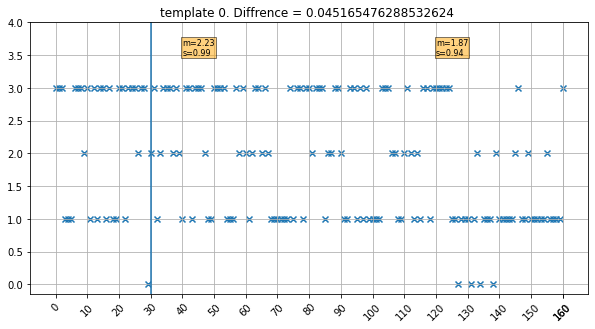

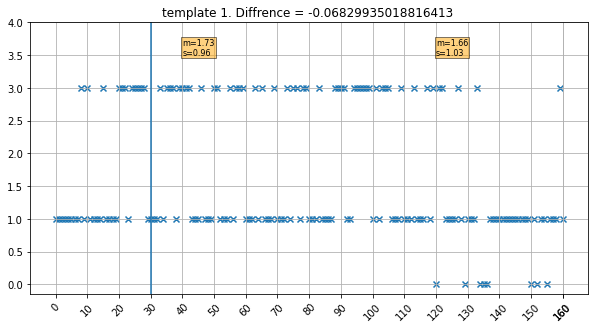

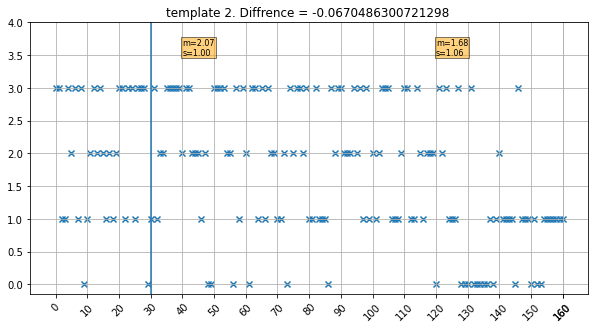

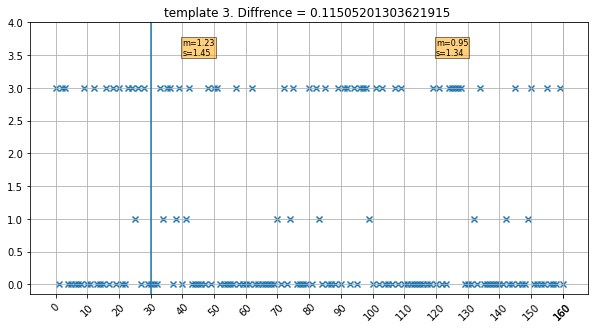

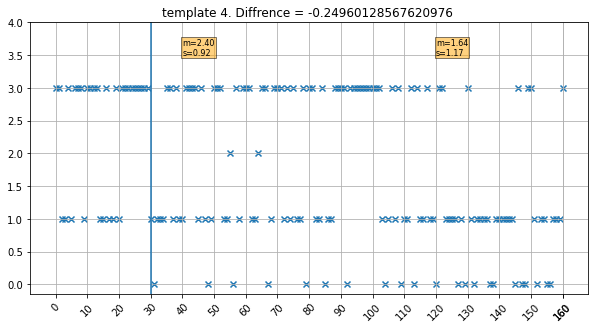

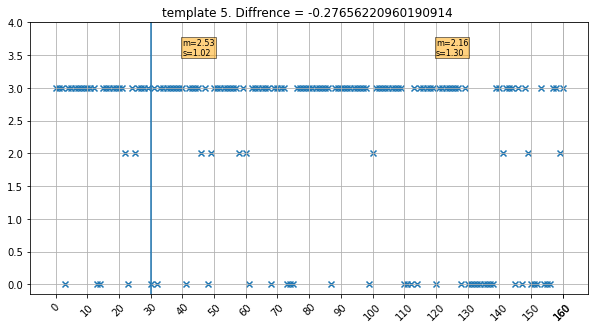

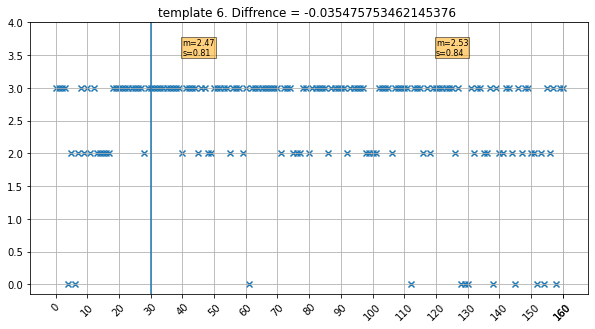

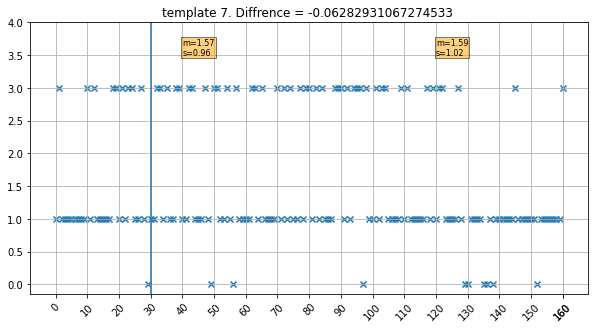

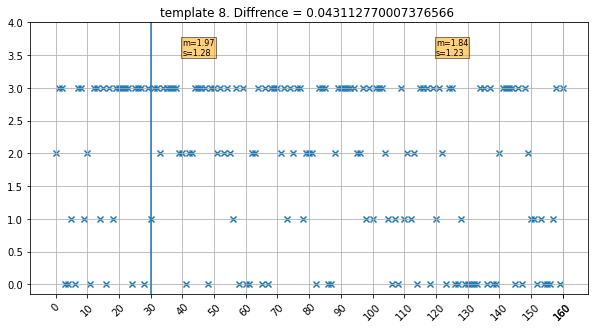

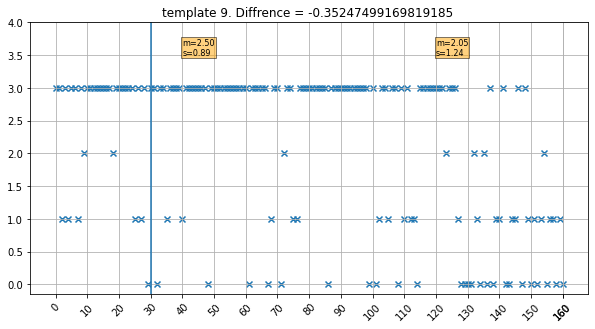

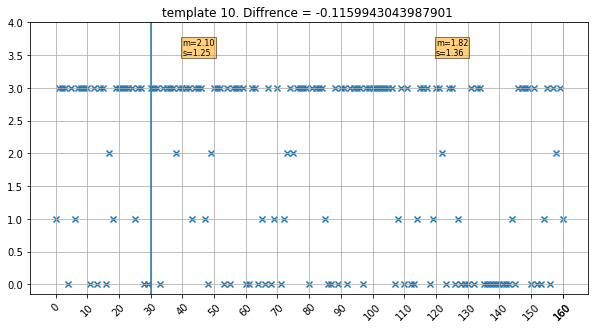

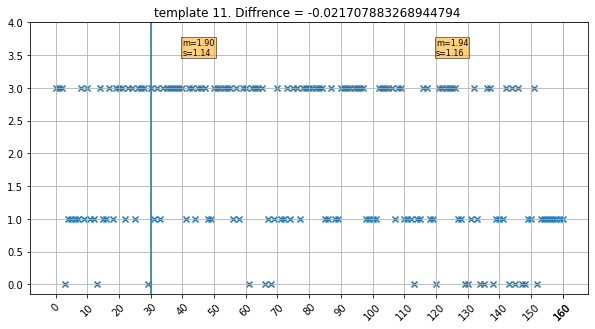

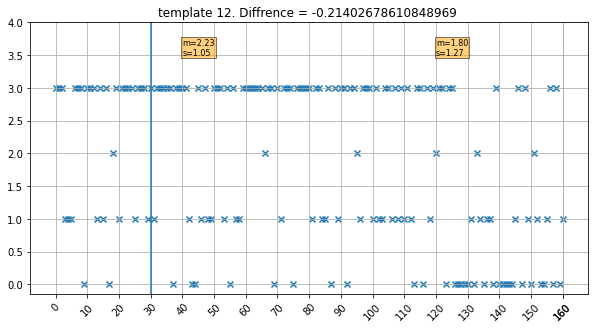

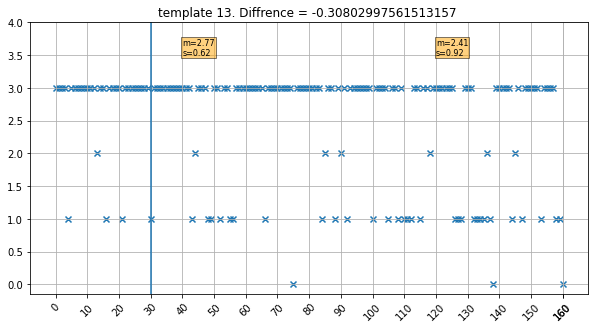

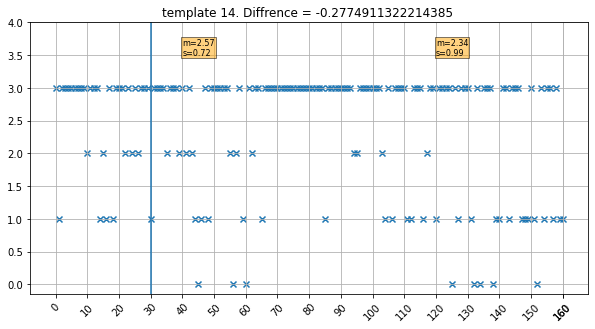

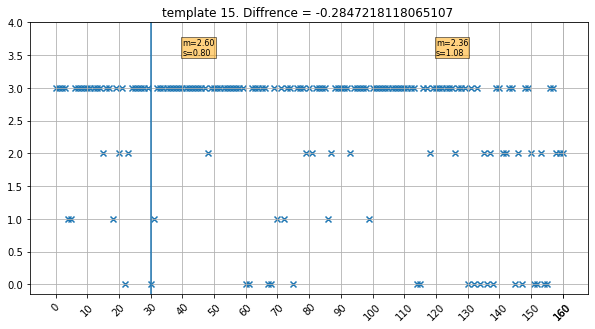

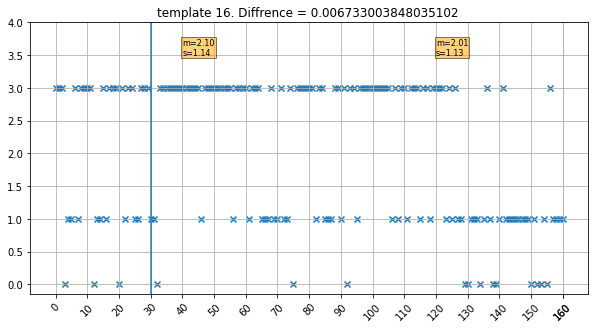

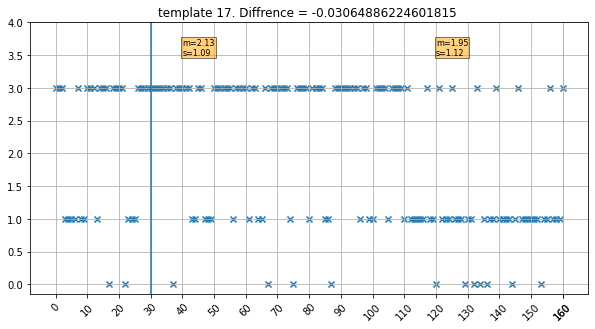

[ 5 14 15 13  9]
[0.27656221 0.27749113 0.28472181 0.30802998 0.35247499]
Classification accuracy without selecting features: 0.780
[ 0  2  5 11 12]
Classification accuracy after univariate feature selection: 0.805


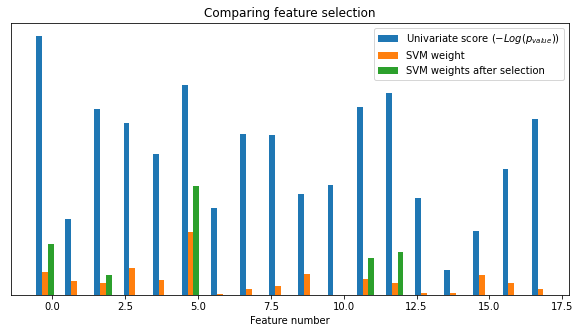

(120, 5)
(41, 5)
Classification accuracy after mine selection: 0.805


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import os 

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

#per fare feature sel. sul dataset bilanciato, togliere # dove si trova e aggiungerlo dove indicato
root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
#labels_name = [str(i) for i in range(19)]
#dataset = pd.read_csv(os.path.join(root, 'bilanciato_miei_3.csv'), header=0, index_col=0)
##X = dataset.iloc[:, :-1].to_numpy()
dataset = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
X = dataset.to_numpy()
dataset_c = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
#X = dataset.iloc[:, 3:-1].to_numpy()
#y = dataset.iloc[:, -1]
#aggiungere commento da qui...
y = dataset_c.loc[dataset.index.values, 'DGN1'].to_numpy()
unique = np.unique(y)
print(unique)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
print(mapping)
for idx in mapping[2]:
    y[idx] = unique[1]
index_normal = y[y == 'NORMALI'].shape[0]
y = np.array(list(map(label, y)))
print(y)
idx_2 = [y != 2]
X = X[idx_2]
X_s = StandardScaler().fit_transform(X)
y = y[idx_2]
print(np.bincount(y))
#... a qui (usare ''')

index_normal = y[y < 1].shape[0]
patients = np.arange(X.shape[0], dtype=int)
differences = []
for template in range(X.shape[1]):
    labels = X[:, template]
    mean_normal = np.mean(labels[:index_normal])
    std_normal = np.std(labels[:index_normal])
    mean_mci = np.mean(labels[index_normal:])
    std_mci = np.std(labels[index_normal:])
    plt.figure(figsize=(10, 5))
    plt.scatter(patients, labels, marker='x')
    plt.xticks(np.append(patients[::10], patients[-1]), rotation=45)
    plt.ylim(top=4)
    plt.text(int(len(labels)/4), 3.5, 'm={:.2f}\ns={:.2f}'.format(mean_normal, std_normal),
             fontsize=8, bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 1})
    plt.text(int(3*len(labels) / 4), 3.5, 'm={:.2f}\ns={:.2f}'.format(mean_mci, std_mci),
             fontsize=8, bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 1})
    plt.axvline(x=index_normal)
    plt.title('template {}. Diffrence = {} '.format(template, std_normal-std_mci))
    plt.grid(True)
    plt.show()   
    plt.close('all')
    differences.append(np.abs(std_normal-std_mci))
top5 = np.argsort(differences)[-5:]
print(top5)
print(np.array(differences)[top5])
X_indices = np.arange(X.shape[-1])
best = 5
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0)
selector = SelectKBest(f_classif, k=best)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.figure(figsize=(10, 5))
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')
clf = make_pipeline(StandardScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))
print(X_indices[selector.get_support()])
svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=best), StandardScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

clf_top5 = make_pipeline(StandardScaler(), LinearSVC())
X_top5_train = X_train[:, top5]
X_top5_test = X_test[:, top5]
print(X_top5_train.shape)
print(X_top5_test.shape)
clf_top5.fit(X_top5_train, y_train)
print('Classification accuracy after mine selection: {:.3f}'
      .format(clf_top5.score(X_top5_test, y_test)))

In [3]:
y

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0])

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score no selection: 0.8
train score no selection: 0.9666666666666667
test score no selection: 0.7560975609756098

SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-10.0, decision_function_shape='ovr', degree=4, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
cv score selection: 0.7416666666666666
train score selection: 0.675
test score selection: 0.7073170731707317

best1 features: [1]
SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.00

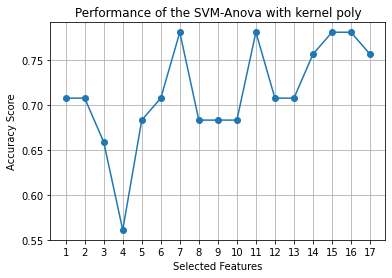

SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv score no selection: 0.8083333333333332
train score no selection: 0.9916666666666667
test score no selection: 0.8048780487804879

SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv score selection: 0.675
train score selection: 0.675
test score selection: 0.7073170731707317

best1 features: [1]
SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv 

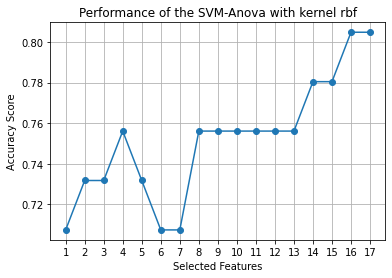

SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma=0.1,
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
cv score no selection: 0.8166666666666667
train score no selection: 0.8166666666666667
test score no selection: 0.8048780487804879

SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma=1,
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
cv score selection: 0.8166666666666667
train score selection: 0.8166666666666667
test score selection: 0.8048780487804879

best1 features: [1]
SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma=0.1,
    kernel='sigmoid', max_iter=-1, probability=False, random_state=No

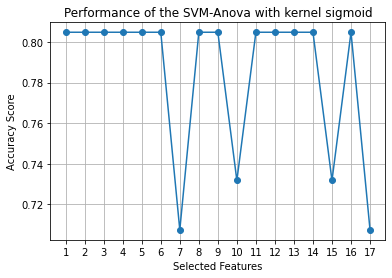

[(0.7804878048780488, 7), (0.8048780487804879, 16), (0.8048780487804879, 1)]


In [4]:

'''best=5
selector = SelectKBest(f_classif, k=best)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.figure(figsize=(10, 5))
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')'''

param_search = [
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4, 5]},
              {'C':[0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
]
kernels = ['poly', 'rbf', 'sigmoid']
best_scores = []
for i in range(len(param_search)):
  svm = GridSearchCV(SVC(kernel=kernels[i], class_weight='balanced'), param_search[i], cv=5, scoring='accuracy', refit=True)
  pipeline_not_sel = Pipeline([('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
  pipeline_not_sel.fit(X_train, y_train)  
  cv_score = pipeline_not_sel[-1].best_score_
  m = pipeline_not_sel[-1].best_estimator_    
  print(m)     
  train_acc = pipeline_not_sel.score(X_train, y_train)
  test_acc = pipeline_not_sel.score(X_test, y_test)
  print("cv score no selection: {}".format(cv_score))
  print("train score no selection: {}".format(train_acc))
  print("test score no selection: {}\n".format(test_acc)) 

  pipeline_sel = Pipeline([('feature_sele',SelectKBest(f_classif)),
                        ('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
  scores = []
  for best in X_indices[1:]:
    pipeline_sel.set_params(feature_sele__k=best)
    pipeline_sel.fit(X_train, y_train)
    cv_score = pipeline_sel[-1].best_score_
    m = pipeline_sel[-1].best_estimator_ 
    print(m)     
    support = pipeline_sel[0].get_support()
    train_acc = pipeline_sel.score(X_train, y_train)
    test_acc = pipeline_sel.score(X_test, y_test)
    print("cv score selection: {}".format(cv_score))
    print("train score selection: {}".format(train_acc))
    print("test score selection: {}\n".format(test_acc))
    scores.append(test_acc)
    print('best{} features: {}'.format(best, X_indices[support]+1))
  best_scores.append((max(scores), scores.index(max(scores))+1))
  plt.figure(figsize=(6, 4))
  plt.plot(X_indices[1:], scores, 'o-')
  plt.title(
      'Performance of the SVM-Anova with kernel '+kernels[i])
  plt.xticks(X_indices[1:])
  plt.xlabel('Selected Features')
  plt.ylabel('Accuracy Score')
  plt.axis('tight')
  plt.grid(True)
  plt.show()
  plt.close('all')

print(best_scores)
  
  

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-5.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score no selection: 0.8166666666666667
train score no selection: 0.8166666666666667
test score no selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score selection: 0.8166666666666667
train score selection: 0.8166666666666667
test score selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001,

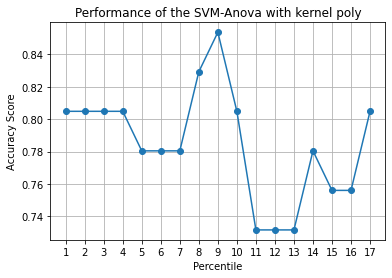

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score no selection: 0.825
train score no selection: 0.9916666666666667
test score no selection: 0.7804878048780488

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv score selection: 0.8166666666666667
train score selection: 0.8166666666666667
test score selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv score selection: 0.8

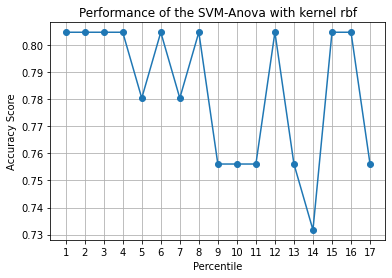

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score no selection: 0.825
train score no selection: 0.725
test score no selection: 0.7317073170731707

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score selection: 0.8166666666666667
train score selection: 0.8166666666666667
test score selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score selection: 0.8

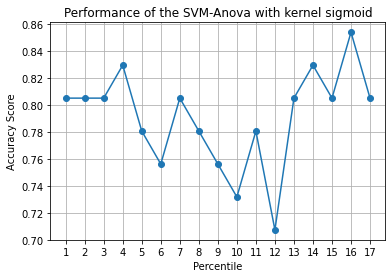

[0.8536585365853658, 0.8048780487804879, 0.8536585365853658]


In [5]:
#chi

'''selector = SelectKBest(chi2, k=best)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.figure(figsize=(10, 5))
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')'''

param_search = [
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4, 5]},
              {'C':[0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
]
kernels = ['poly', 'rbf', 'sigmoid']
best_scores = []
for i in range(len(param_search)):
  svm = GridSearchCV(SVC(kernel=kernels[i]), param_search[i], cv=5, scoring='accuracy', refit=True)
  pipeline_not_sel = Pipeline([('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
  pipeline_not_sel.fit(X_train, y_train)  
  cv_score = pipeline_not_sel[-1].best_score_
  m = pipeline_not_sel[-1].best_estimator_    
  print(m)     
  train_acc = pipeline_not_sel.score(X_train, y_train)
  test_acc = pipeline_not_sel.score(X_test, y_test)
  print("cv score no selection: {}".format(cv_score))
  print("train score no selection: {}".format(train_acc))
  print("test score no selection: {}\n".format(test_acc)) 

  pipeline_sel = Pipeline([('feature_sele',SelectKBest(chi2)),
                        ('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
  scores = []
  for best in X_indices[1:]:
    pipeline_sel.set_params(feature_sele__k=best)
    pipeline_sel.fit(X_train, y_train)
    cv_score = pipeline_sel[-1].best_score_
    m = pipeline_sel[-1].best_estimator_ 
    print(m)     
    support = pipeline_sel[0].get_support()
    train_acc = pipeline_sel.score(X_train, y_train)
    test_acc = pipeline_sel.score(X_test, y_test)
    print("cv score selection: {}".format(cv_score))
    print("train score selection: {}".format(train_acc))
    print("test score selection: {}\n".format(test_acc))
    scores.append(test_acc)
  best_scores.append(max(scores))
  plt.plot(X_indices[1:], scores, 'o-')
  plt.title(
      'Performance of the SVM-Anova with kernel '+kernels[i])
  plt.xticks(X_indices[1:])
  plt.xlabel('Percentile')
  plt.ylabel('Accuracy Score')
  plt.axis('tight')
  plt.grid(True)
  plt.show()

print(best_scores)
  
  

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-5.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score no selection: 0.8166666666666667
train score no selection: 0.8166666666666667
test score no selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score selection: 0.8166666666666667
train score selection: 0.8166666666666667
test score selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001,

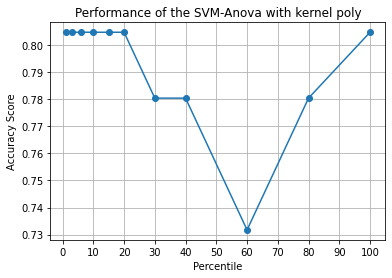

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score no selection: 0.825
train score no selection: 0.9916666666666667
test score no selection: 0.7804878048780488

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv score selection: 0.8166666666666667
train score selection: 0.8166666666666667
test score selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv score selection: 0.8

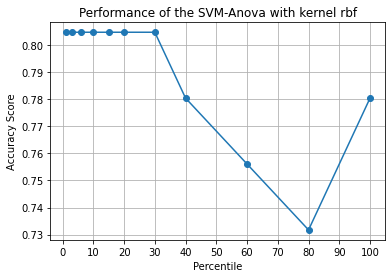

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score no selection: 0.825
train score no selection: 0.725
test score no selection: 0.7317073170731707

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score selection: 0.8166666666666667
train score selection: 0.8166666666666667
test score selection: 0.8048780487804879

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
cv score selection: 0.8

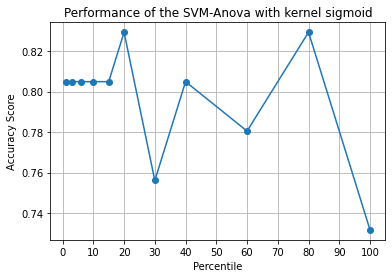

[0.8048780487804879, 0.8048780487804879, 0.8292682926829268]


In [6]:
param_search = [
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4, 5]},
               {'C':[0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
]
kernels = ['poly', 'rbf', 'sigmoid']
best_scores = []
for i in range(len(param_search)):
  svm = GridSearchCV(SVC(kernel=kernels[i]), param_search[i], cv=5, scoring='accuracy', refit=True)
  pipeline_not_sel = Pipeline([('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
  pipeline_not_sel.fit(X_train, y_train)  
  cv_score = pipeline_not_sel[-1].best_score_
  m = pipeline_not_sel[-1].best_estimator_    
  print(m)     
  train_acc = pipeline_not_sel.score(X_train, y_train)
  test_acc = pipeline_not_sel.score(X_test, y_test)
  print("cv score no selection: {}".format(cv_score))
  print("train score no selection: {}".format(train_acc))
  print("test score no selection: {}\n".format(test_acc))
  pipeline_sel = Pipeline([('feature_sele',SelectPercentile(chi2)),
                        ('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
  scores = []
  
  percentiles = [1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100]
  for percentile in percentiles:
    pipeline_sel.set_params(feature_sele__percentile=percentile)
    pipeline_sel.fit(X_train, y_train)
    cv_score = pipeline_sel[-1].best_score_
    m = pipeline_sel[-1].best_estimator_ 
    print(m)    
    train_acc = pipeline_sel.score(X_train, y_train)
    test_acc = pipeline_sel.score(X_test, y_test)
    print("cv score selection: {}".format(cv_score))
    print("train score selection: {}".format(train_acc))
    print("test score selection: {}\n".format(test_acc))
    scores.append(test_acc)
    
  best_scores.append(max(scores))
  plt.plot(percentiles, scores, 'o-')
  plt.title(
      'Performance of the SVM-Anova with kernel '+kernels[i])
  plt.xticks(np.linspace(0, 100, 11, endpoint=True))
  plt.xlabel('Percentile')
  plt.ylabel('Accuracy Score')
  plt.axis('tight')
  plt.grid(True)
  plt.show()

print(best_scores)
  
  

Linear model:-0.075 * X0 + 0.03 * X1 + -0.024 * X2 + -0.071 * X3 + -0.027 * X4 + -0.051 * X5 + 0.017 * X6 + 0.024 * X7 + -0.022 * X8 + 0.048 * X9 + -0.004 * X10 + -0.044 * X11 + -0.025 * X12 + -0.009 * X13 + 0.012 * X14 + 0.03 * X15 + -0.023 * X16 + -0.032 * X17


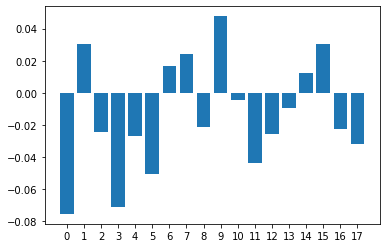

Lasso model:-0.06 * X0 + 0.01 * X1 + -0.009 * X2 + -0.075 * X3 + -0.026 * X4 + -0.048 * X5 + 0.0 * X6 + 0.0 * X7 + -0.017 * X8 + 0.025 * X9 + -0.0 * X10 + -0.039 * X11 + -0.028 * X12 + -0.004 * X13 + 0.0 * X14 + 0.013 * X15 + -0.01 * X16 + -0.021 * X17


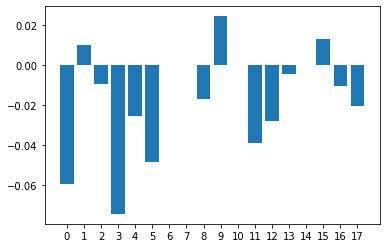

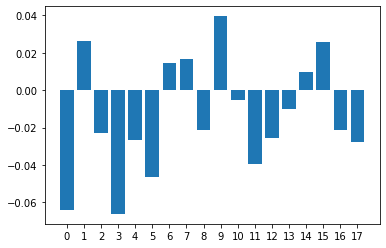

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
 
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 
print("Linear model:{}".format(pretty_print_linear(lr.coef_)))
importance = lr.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))])
plt.show()

lasso = Lasso(alpha=0.01)
lasso.fit(StandardScaler().fit_transform(X_train), y_train) 
print("Lasso model:{}".format(pretty_print_linear(lasso.coef_)))
importance = lasso.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))])
plt.show()


ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)
importance = ridge.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))])
plt.show()


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from collections import defaultdict
from sklearn.model_selection import ShuffleSplit

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(X_indices)
names = ["X%s" % i for i in X_indices]
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

scores = defaultdict(list)
rs = ShuffleSplit(len(X),test_size=.25, random_state=0)
for train_idx, test_idx in rs.split(X):    
    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    Y_train, Y_test = y[train_idx], y[test_idx]
    #print(X_test)
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        test_val = X_t.iloc[:, i].values
        np.random.shuffle(test_val)
        X_t.iloc[:, i] = test_val
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Features sorted by their score:
[(0.1215, 'X0'), (0.1063, 'X3'), (0.0985, 'X4'), (0.0733, 'X8'), (0.0642, 'X2'), (0.0632, 'X7'), (0.0561, 'X11'), (0.0526, 'X14'), (0.0463, 'X12'), (0.0459, 'X9'), (0.0442, 'X13'), (0.0393, 'X6'), (0.038, 'X10'), (0.0349, 'X16'), (0.0343, 'X15'), (0.0284, 'X1'), (0.0272, 'X5'), (0.0256, 'X17')]


AttributeError: ignored

In [ ]:
from sklearn.feature_selection import RFE, RFECV

lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr)
rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, scoring='accuracy')
rfecv.fit(X, y)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfecv.ranking_), names)))
      


In [ ]:
!git clone https://github.com/scikit-learn-contrib/stability-selection.git

In [ ]:
%cd stability-selection/

In [ ]:
!python setup.py install

In [ ]:
from stability_selection import StabilitySelection, RandomizedLasso, plot_stability_path
import numpy as np 
lambda_grid = np.linspace(0.001, 0.5, num=100)
print(X)
print(y)
for weakness in [0.2, 0.5, 1.0]:
        estimator = RandomizedLasso(weakness=weakness)
        selector = StabilitySelection(base_estimator=estimator, lambda_name='alpha',
                                      lambda_grid=lambda_grid, threshold=0.9, verbose=1)
        selector.fit(X, y)

        fig, ax = plot_stability_path(selector)
        fig.show()

In [ ]:
import scipy.special as sp

comb = [sp.binom(18, k) for k in range(1,19)]
print(sum(comb))

In [ ]:
param_search = [
                {'C':[0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                          
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
]
kernels = ['rbf', 'sigmoid']
best_scores = np.zeros(2)
print(X_train)
for kernel_idx in range(len(kernels)):
  best_scores_comb = []
  best_features = []
  features_avail = X_indices.copy() 
  for i in X_indices:
    best_score = 0
    print(features_avail)
    for p in range(len(features_avail)):
      
      new_feat = np.append(best_features, features_avail[p]) 
      print(new_feat)
      if i == 0:     
        X_train_temp = X_train.iloc[:, new_feat].values.reshape(-1, 1)
        X_test_temp = X_test.iloc[:, new_feat].values.reshape(-1, 1)
      else:
         X_train_temp = X_train.iloc[:, new_feat]
         X_test_temp = X_test.iloc[:, new_feat]
        
      svm = GridSearchCV(SVC(kernel=kernels[kernel_idx]), param_search[kernel_idx], cv=5, scoring='accuracy', refit=True)
      pipeline = Pipeline([('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
      pipeline.fit(X_train_temp, y_train)  
      cv_score = pipeline[-1].best_score_
      m = pipeline[-1].best_estimator_       
      train_acc = pipeline.score(X_train_temp, y_train)
      test_acc = pipeline.score(X_test_temp, y_test)
      if test_acc > best_score:
        best_score = test_acc
        best_model = m
        best_feat = features_avail[p]
        best_feat_idx = p
    best_scores_comb.append(best_score)
    best_features.append(best_feat)
    print('{} iteration'.format(i))
    print(best_model)
    print(best_scores_comb)
    print(best_features)    
    if best_score > best_scores[kernel_idx]:
      best_scores[kernel_idx] = best_score
    features_avail = np.delete(features_avail, best_feat_idx)  

  plt.plot(X_indices, best_scores_comb, 'o-')
  plt.title(
      'Performance with kernel '+kernels[kernel_idx])
  plt.xticks(X_indices)
  plt.xlabel('Percentile')
  plt.ylabel('Accuracy Score')
  plt.axis('tight')
  plt.grid(True)
  plt.show()     
    

In [ ]:
param_search = [
                {'C':[0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                            
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
]
kernels = ['rbf', 'sigmoid']
best_scores = np.zeros(2)
print(X_train)
for kernel_idx in range(len(kernels)):
  best_scores_comb = []
  worst_features = []
  features_avail = X_indices.copy() 
  for i in X_indices:
    best_score = 0
    print(features_avail)
    for p in range(len(features_avail)-1):      
      new_feat = np.delete(features_avail, p) 
      print(new_feat)
      if i == len(features_avail) - 1:     
        X_train_temp = X_train.iloc[:, new_feat].values.reshape(-1, 1)
        X_test_temp = X_test.iloc[:, new_feat].values.reshape(-1, 1)
      else:
         X_train_temp = X_train.iloc[:, new_feat]
         X_test_temp = X_test.iloc[:, new_feat]
        
      svm = GridSearchCV(SVC(kernel=kernels[kernel_idx]), param_search[kernel_idx], cv=5, scoring='accuracy', refit=True)
      pipeline = Pipeline([('scaler',  StandardScaler()),
                      ('clf_cv',svm)])
      pipeline.fit(X_train_temp, y_train)  
      cv_score = pipeline[-1].best_score_
      m = pipeline[-1].best_estimator_       
      train_acc = pipeline.score(X_train_temp, y_train)
      test_acc = pipeline.score(X_test_temp, y_test)
      if test_acc > best_score:
        best_score = test_acc
        best_model = m
        best_feat = features_avail[p]
        best_feat_idx = p
    best_scores_comb.append(best_score)
    worst_features.append(best_feat)
    print('{} iteration'.format(i))
    print(best_model)
    print(best_scores_comb)
    print(worst_features)    
    if best_score > best_scores[kernel_idx]:
      best_scores[kernel_idx] = best_score
    features_avail = np.delete(features_avail, best_feat_idx)  

  plt.plot(X_indices, best_scores_comb, 'o-')
  plt.title(
      'Performance with kernel '+kernels[kernel_idx])
  plt.xticks(X_indices)
  plt.xlabel('Percentile')
  plt.ylabel('Accuracy Score')
  plt.axis('tight')
  plt.grid(True)
  plt.show()     
    


In [ ]:
from itertools import combinations
param_search = [
                {'C':[0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},              
                {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
]
kernels = ['rbf', 'sigmoid']
best_scores = np.zeros(2)
print(X_train)
for kernel_idx in range(len(kernels)):
  best_scores_comb = []
  best_features = []
  range_comb = X_indices[1:]
  for i in range_comb:
    comb = list(combinations(X_indices, i))
    print(comb)
    for f in comb:
      best_score = 0
      if i == 1:
        X_train_temp = X_train.iloc[:, list(f)].values.reshape(-1, 1)
        X_test_temp = X_test.iloc[:, list(f)].values.reshape(-1, 1)
      else:
        X_train_temp = X_train.iloc[:, list(f)]
        X_test_temp = X_test.iloc[:, list(f)]            
      svm = GridSearchCV(SVC(kernel=kernels[kernel_idx]), param_search[kernel_idx], cv=5, scoring='accuracy', refit=True)
      pipeline = Pipeline([('scaler',  StandardScaler()),
                    ('clf_cv',svm)])
      pipeline.fit(X_train_temp, y_train)  
      cv_score = pipeline[-1].best_score_
      m = pipeline[-1].best_estimator_       
      train_acc = pipeline.score(X_train_temp, y_train)
      test_acc = pipeline.score(X_test_temp, y_test)
      if test_acc > best_score:
        best_score = test_acc
        best_model = m
        best_feat = f          
    best_scores_comb.append(best_score)
    best_features.append(best_feat)      
    print(best_model)
    print(best_scores_comb)
    print(best_features)    
    if best_score > best_scores[kernel_idx]:
      best_scores[kernel_idx] = best_score      
  plt.plot(range_comb, best_scores_comb, 'o-')
  plt.title(
      'Performance with kernel '+kernels[kernel_idx])
  plt.xticks(range_comb)
  plt.xlabel('Percentile')
  plt.ylabel('Accuracy Score')
  plt.axis('tight')
  plt.grid(True)
  plt.show()     